# Orca
QLauncher is compatible with Orca Computing photonic computers and features algorithms based based on photonic computing.

Let's start by defining a problem to be solved, we will use Exact Cover in this tutorial.

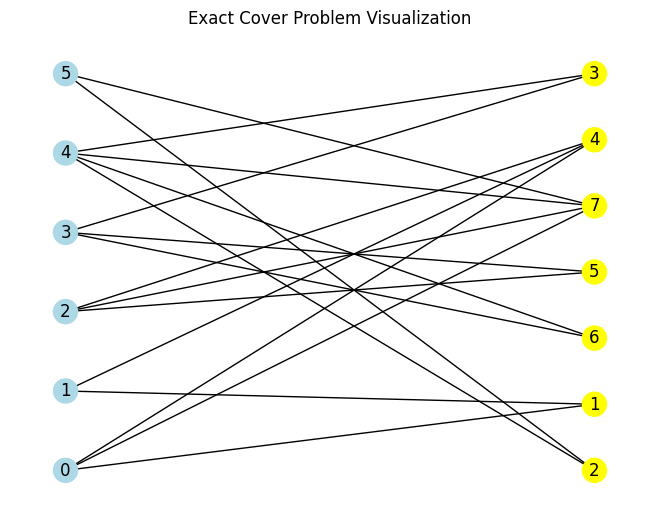

In [1]:
from qlauncher.problems import EC

pr = EC.from_preset("default")
pr.visualize()

## Binary Bosonic Solver

Binary Bosonic solver is a variational algorithm developed by ORCA Computing allowing their photonic computers to solve combinatorial problems. It works as follows: first we encode solutions to a given problem as a bitstring and declare how a cost of the solution should be calculated based on its bistring, we can also use the QUBO format for that. Next a parametrizable photonic circuit gets constructed and we sample bitstrings from it. Each bitstring then gets modified with bits being flipped with probabilities which are also parametrizable. Finally, bitstrings are evaluated in terms of solution quality and the corresponding gradient is calculated allowing us to optimize both the parameters of the circuit (beamsplitter angles) as well as bit flip probabilities.

Let's initialize the BBS algorithm for use with QLauncher, there are couple of parameters we can set which will influence the process of training, such as number of iterations, learning rate of the beamsplitter angles or learning rate of the flip probabilities.

In [2]:
from qlauncher.routines.orca import BBS

alg = BBS(updates=800, learning_rate=1e-3, learning_rate_flip=1e-3, print_frequency=400)

Now we need to define the backend our algorithm will run on, we will use a local Orca simulator, but you can also connect to a real Orca computer if you have access to one

In [3]:
from qlauncher.routines.orca import OrcaBackend

backend = OrcaBackend("local_simulator")

Now we can use QLauncher to launch BBS on the selected backend:

In [4]:
from qlauncher.launcher import QLauncher

launcher = QLauncher(pr, alg, backend)
result = launcher.run()
result

Update: 001 | Loss: 0.7850 | Best Cost: -1.5000
Update: 400 | Loss: 0.5450 | Best Cost: -1.5000
Update: 800 | Loss: 0.3550 | Best Cost: -1.5000


Result(bitstring=001000, energy=-1.5)

The results corresponds to the following matching, since BBS is non-deterministic the result might be suboptimal:

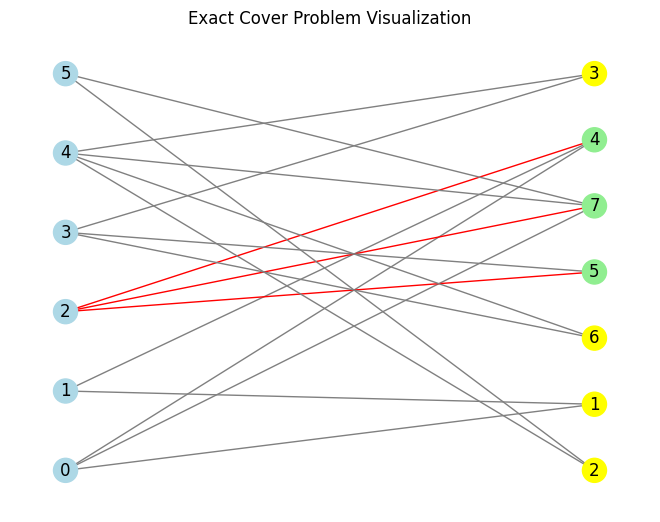

In [5]:
pr.visualize(result.best_bitstring)